# Intro

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from scipy import stats

import xarray as xa

In [2]:
all0205 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200207-200505.nc", engine='netcdf4')
all0508 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200506-200804.nc", engine='netcdf4')
all0811 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_200805-201103.nc", engine='netcdf4')
all1114 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201104-201402.nc", engine='netcdf4')
all1417 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201403-201701.nc", engine='netcdf4')
all1821 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_201702-201912.nc", engine='netcdf4')
all2123 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202001-202211.nc", engine='netcdf4')
all2223 = xa.open_dataset("../daa/atropics/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_202212-202302.nc", engine='netcdf4')

In [3]:
var = "toa_lw"
alllw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_lw_clr_mon"]],], 
               dim='time')

In [4]:
var = "toa_sw"
allsw = xa.concat( [all0205[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0508[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all0811[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1114[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1417[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all1821[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],
                    all2123[["cldarea_cldtyp_mon", f"{var}_cldtyp_mon", "toa_sw_clr_mon"]],], 
               dim='time')

In [5]:
#Gistemp Surface temp by lat, lon and time
#st_global_anom_raghu = xa.open_dataset("../daa/gistemp1200_GHCNv4_ERSSTv5.nc").sel(time=ragutime).tempanomaly
#gmst_anom_raghu = st_global_anom_raghu.mean(["lat", "lon"])
#gmst_anom_raghu 

In [6]:
#0
trop = slice(-30,30)
ragutime = slice('2002-07-15T00:00:00.000000000',\
                 '2020-12-15T00:00:00.000000000' )

# Tropics

In [7]:
RclrLW_trop = alllw.sel(lat=trop,time=ragutime).toa_lw_clr_mon.mean(["lon"])
RovcLW_trop = alllw.sel(lat=trop,time=ragutime).toa_lw_cldtyp_mon.mean(["lon"])
lwK_trop = (RclrLW_trop - RovcLW_trop)/100

In [8]:
RclrSW_trop = allsw.sel(lat=trop,time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_trop = allsw.sel(lat=trop,time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_trop = (RclrSW_trop - RovcSW_trop)/100

In [9]:
#1d
#If I dont mean over lon before, this will have loads of nans
K_trop = lwK_trop + swK_trop
K_trop

<xarray.DataArray (time: 222, lat: 60, opt: 6, press: 7)>
array([[[[-6.95322827e-02,  3.64839882e-02,  8.21122974e-02, ...,
           2.25793272e-01,  2.04872966e-01,  7.49827921e-02],
         [-1.62981927e-01, -6.67938590e-02,  3.76801491e-02, ...,
           3.13377500e-01,  4.12711978e-01,  3.57284546e-01],
         [-3.40756178e-01, -2.39068091e-01, -9.13528800e-02, ...,
           2.37454534e-01,  4.44557786e-01,             nan],
         [-5.62052011e-01, -4.30202931e-01, -2.85203397e-01, ...,
           5.42105436e-02,  2.92046666e-01,             nan],
         [-7.38983631e-01, -5.92498481e-01, -4.67242599e-01, ...,
          -9.60992575e-02,  1.48593426e-01,             nan],
         [-8.96904230e-01, -7.89884746e-01, -6.86066270e-01, ...,
          -2.32035637e-01,  6.15028143e-02,  3.62516999e-01]],

        [[-6.88544065e-02,  4.08401489e-02,  8.98803324e-02, ...,
           2.18167841e-01,  2.13180110e-01,  5.63667268e-02],
         [-1.70478523e-01, -6.60903454e-02,  3.68929505e-02, ...,
           3.18872720e-01,  4.23389077e-01,  1.86389953e-01],
         [-3.47768605e-01, -2.52343833e-01, -1.08421326e-01, ...,
           2.30587900e-01,  4.48855877e-01,             nan],
         [-5.74028909e-01, -4.45169687e-01, -3.01013947e-01, ...,
...
         [-5.49480498e-01, -4.36248958e-01, -3.00791979e-01, ...,
           6.08726740e-02,  2.84405172e-01,             nan],
         [-7.56479204e-01, -6.28482819e-01, -5.21334887e-01, ...,
          -1.25935137e-01,  1.22711658e-01,  3.97061825e-01],
         [-8.56575906e-01, -8.30076456e-01, -7.36992836e-01, ...,
          -3.32523346e-01,  1.20261908e-02,  3.00069809e-01]],

        [[-6.88076392e-02,  4.93827388e-02,  1.28590971e-01, ...,
           2.50883698e-01,  2.62027085e-01,  1.58594668e-01],
         [-1.67061299e-01, -4.12570089e-02,  7.99615383e-02, ...,
           3.14928621e-01,  4.09985334e-01,  3.39138985e-01],
         [-3.51219714e-01, -2.07177818e-01, -7.20238686e-02, ...,
           2.42989719e-01,  4.26641285e-01,             nan],
         [-5.50227284e-01, -4.13185418e-01, -2.83401519e-01, ...,
           6.33349419e-02,  2.95367837e-01,             nan],
         [-7.50771999e-01, -6.28568172e-01, -4.94578242e-01, ...,
          -1.21966183e-01,  1.33485675e-01,  3.80871654e-01],
         [-8.30153108e-01, -8.16523433e-01, -7.18631148e-01, ...,
          -3.01263452e-01,  6.15183115e-02,  2.83497334e-01]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2020-12-15
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0

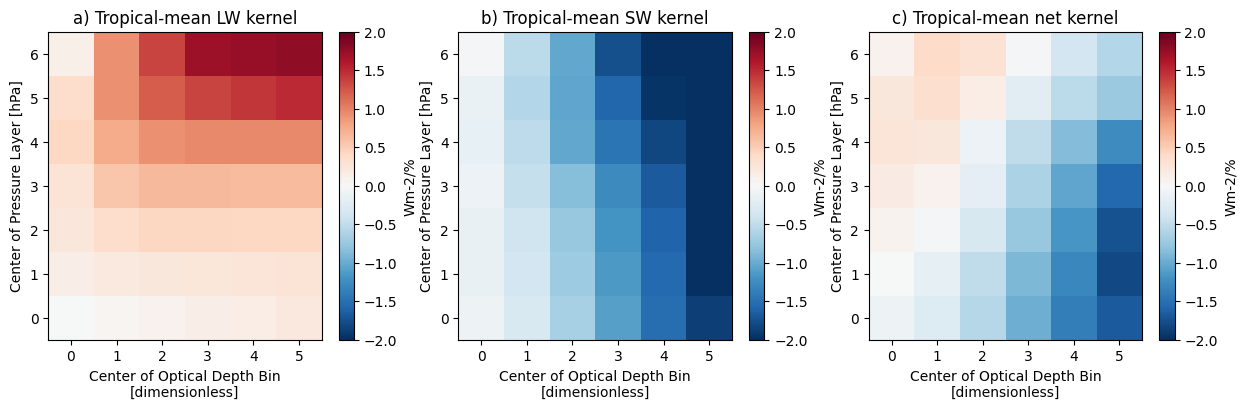

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwK_trop.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) Tropical-mean LW kernel")
swK_trop.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) Tropical-mean SW kernel")
K_trop.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) Tropical-mean net kernel")
plt.savefig("kernels.png")

In [11]:
#Another way of testing if the kernels values are ok
p = np.array([1000.0 ,  800.0,  680,  560,  440, 310.0,  180,  10])
midpoints = [(p[i] + p[i -1])/2 for i in np.arange(len(p)) ]
midpoints

[505.0, 900.0, 740.0, 620.0, 500.0, 375.0, 245.0, 95.0]

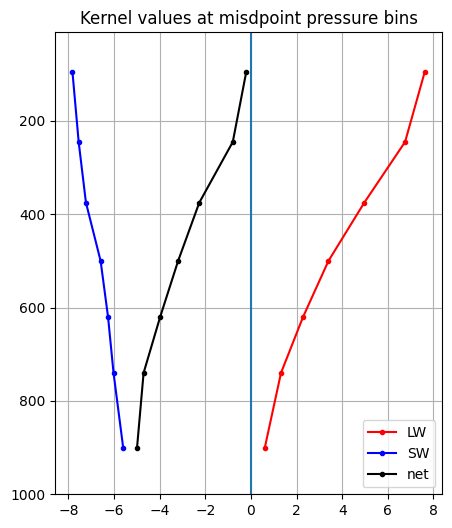

In [12]:
plt.figure(figsize=(5,6))
plt.plot(lwK_trop.mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-r", label="LW")
plt.plot(swK_trop.mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-b", label="SW")
plt.plot(K_trop.mean(["lat","time"]).sum("opt"), midpoints[1:], ".-k", label="net")
plt.gca().invert_yaxis()
plt.ylim(1000,10)
plt.vlines(0, ymin=1000, ymax=10)
plt.grid()
plt.legend()
plt.title("Kernel values at misdpoint pressure bins")
plt.savefig("kernels_values.png")

In [13]:
#2
area_trop = alllw.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime).mean("lon")
cc_trop_anom = area_trop.groupby('time.month')- area_trop.groupby('time.month').mean('time')

In [14]:
#3
#NOtice! If I mean over lon here rather than when calculating the kernels, the feedback values change slightly (further away than raghuraman's)
#IN the seconfnd 
lwR_trop = lwK_trop*cc_trop_anom
swR_trop = swK_trop*cc_trop_anom

In [15]:
K_trop

<xarray.DataArray (time: 222, lat: 60, opt: 6, press: 7)>
array([[[[-6.95322827e-02,  3.64839882e-02,  8.21122974e-02, ...,
           2.25793272e-01,  2.04872966e-01,  7.49827921e-02],
         [-1.62981927e-01, -6.67938590e-02,  3.76801491e-02, ...,
           3.13377500e-01,  4.12711978e-01,  3.57284546e-01],
         [-3.40756178e-01, -2.39068091e-01, -9.13528800e-02, ...,
           2.37454534e-01,  4.44557786e-01,             nan],
         [-5.62052011e-01, -4.30202931e-01, -2.85203397e-01, ...,
           5.42105436e-02,  2.92046666e-01,             nan],
         [-7.38983631e-01, -5.92498481e-01, -4.67242599e-01, ...,
          -9.60992575e-02,  1.48593426e-01,             nan],
         [-8.96904230e-01, -7.89884746e-01, -6.86066270e-01, ...,
          -2.32035637e-01,  6.15028143e-02,  3.62516999e-01]],

        [[-6.88544065e-02,  4.08401489e-02,  8.98803324e-02, ...,
           2.18167841e-01,  2.13180110e-01,  5.63667268e-02],
         [-1.70478523e-01, -6.60903454e-02,  3.68929505e-02, ...,
           3.18872720e-01,  4.23389077e-01,  1.86389953e-01],
         [-3.47768605e-01, -2.52343833e-01, -1.08421326e-01, ...,
           2.30587900e-01,  4.48855877e-01,             nan],
         [-5.74028909e-01, -4.45169687e-01, -3.01013947e-01, ...,
...
         [-5.49480498e-01, -4.36248958e-01, -3.00791979e-01, ...,
           6.08726740e-02,  2.84405172e-01,             nan],
         [-7.56479204e-01, -6.28482819e-01, -5.21334887e-01, ...,
          -1.25935137e-01,  1.22711658e-01,  3.97061825e-01],
         [-8.56575906e-01, -8.30076456e-01, -7.36992836e-01, ...,
          -3.32523346e-01,  1.20261908e-02,  3.00069809e-01]],

        [[-6.88076392e-02,  4.93827388e-02,  1.28590971e-01, ...,
           2.50883698e-01,  2.62027085e-01,  1.58594668e-01],
         [-1.67061299e-01, -4.12570089e-02,  7.99615383e-02, ...,
           3.14928621e-01,  4.09985334e-01,  3.39138985e-01],
         [-3.51219714e-01, -2.07177818e-01, -7.20238686e-02, ...,
           2.42989719e-01,  4.26641285e-01,             nan],
         [-5.50227284e-01, -4.13185418e-01, -2.83401519e-01, ...,
           6.33349419e-02,  2.95367837e-01,             nan],
         [-7.50771999e-01, -6.28568172e-01, -4.94578242e-01, ...,
          -1.21966183e-01,  1.33485675e-01,  3.80871654e-01],
         [-8.30153108e-01, -8.16523433e-01, -7.18631148e-01, ...,
          -3.01263452e-01,  6.15183115e-02,  2.83497334e-01]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2020-12-15
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0

In [16]:
# Rp = K_trop.sum("opt")*cc_trop_anom.sum("opt")
# Rp.sum("press").mean("lat")

# Rtau = K_trop.sum("press")*cc_trop_anom.sum("press")
# Rtau.sum("opt").mean("lat")

In [17]:
weights = np.cos(np.deg2rad(swR_trop.lat))
weights

<xarray.DataArray 'lat' (lat: 60)>
array([0.87035567, 0.87881714, 0.8870108 , 0.89493436, 0.90258527,
       0.9099613 , 0.9170601 , 0.9238795 , 0.9304176 , 0.9366722 ,
       0.9426415 , 0.94832367, 0.95371693, 0.95881975, 0.96363044,
       0.96814764, 0.9723699 , 0.976296  , 0.9799247 , 0.9832549 ,
       0.9862856 , 0.9890159 , 0.9914449 , 0.9935719 , 0.9953962 ,
       0.9969173 , 0.9981348 , 0.99904823, 0.99965733, 0.9999619 ,
       0.9999619 , 0.99965733, 0.99904823, 0.9981348 , 0.9969173 ,
       0.9953962 , 0.9935719 , 0.9914449 , 0.9890159 , 0.9862856 ,
       0.9832549 , 0.9799247 , 0.976296  , 0.9723699 , 0.96814764,
       0.96363044, 0.95881975, 0.95371693, 0.94832367, 0.9426415 ,
       0.9366722 , 0.9304176 , 0.9238795 , 0.9170601 , 0.9099613 ,
       0.90258527, 0.89493436, 0.8870108 , 0.87881714, 0.87035567],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
Attributes:
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_range:    [-90.  90.]

In [18]:
#4
lwR_trop_mean = lwR_trop.weighted(weights=weights).mean(["lat"])
swR_trop_mean = swR_trop.weighted(weights=weights).mean(["lat"])

In [19]:
#5
#Gistemp GMST anomalies
gmst = pd.read_csv("../daa/GLB.Ts+dSST.csv", skiprows=[0])

gmst = gmst.loc[ gmst['Year'] >= 2002 ]
gmst = gmst.loc[ gmst['Year'] < 2021 ]
lista_gmst = gmst[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']].values.flatten().tolist()
#lista_gmst, len(lista_gmst)
lista_gmst[6:]
#NOT the same as meaqning across all the values, which gives:0.7340974 , 0.23327379, 0.95729756, 0.8614268 , 0.7519227... 
gmst_anom_raghu = np.array(lista_gmst[6:], dtype=np.float16)
gmst_anom_raghu.shape

(222,)

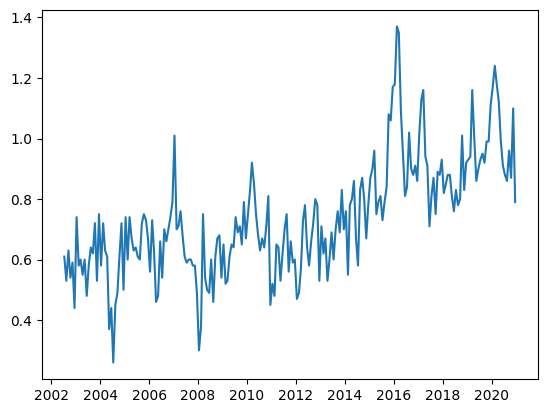

In [20]:
plt.plot(alllw.cldarea_cldtyp_mon.sel(lat=trop, time=ragutime).time, gmst_anom_raghu ) #The GMST anomalies 

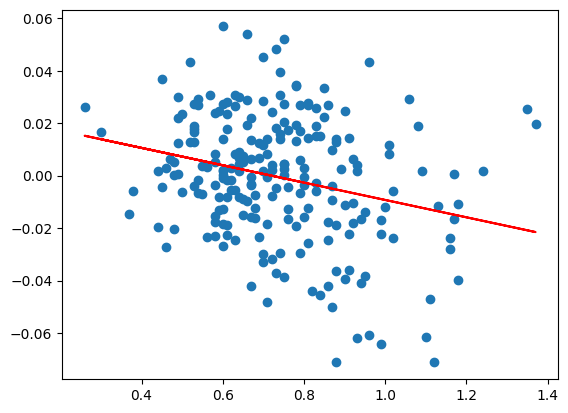

In [21]:
bint = lwR_trop_mean.sel(press=1, opt=1)
lw_regress = stats.linregress(gmst_anom_raghu, bint)
plt.scatter(gmst_anom_raghu, lwR_trop_mean.sel(press=1, opt=1))
plt.plot(gmst_anom_raghu, lw_regress.slope*gmst_anom_raghu + lw_regress.intercept, "-r")

In [22]:
#6
lw_feed_slope =  np.zeros([7,6])
lw_feed_st =  np.zeros([7,6])

for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bint = lwR_trop_mean.sel(press=p, opt=od)
        lw_regress = stats.linregress(gmst_anom_raghu, bint)
        lw_feed_slope[p, od] = lw_regress.slope
        lw_feed_st[p, od] = lw_regress.stderr

lwfeed_trops = xa.DataArray(lw_feed_slope,
                    coords={"press": lwR_trop_mean.press, "opt":lwR_trop_mean.opt, 
                           },
                   )

Tropical LW feedback =  -0.520257078697598
High cloud Tropical LW feedback =  -0.3550432210872373
Low-mid cloud Tropical LW feedback =  -0.16521385761036067


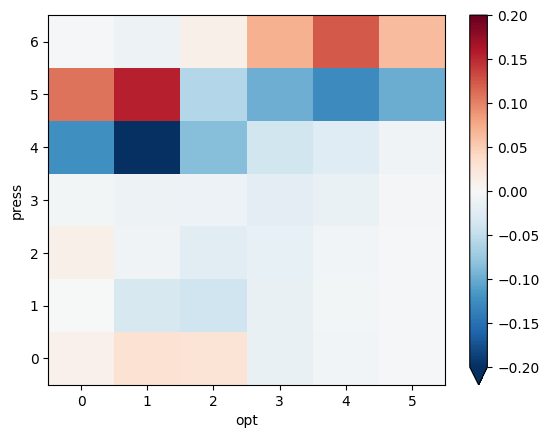

In [23]:
print("Tropical LW feedback = ", lwfeed_trops.sum(["opt", "press"]).data)
print("High cloud Tropical LW feedback = ", lwfeed_trops.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical LW feedback = ", lwfeed_trops.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
lwfeed_trops.plot(vmin=-0.2, vmax=0.2, cmap="RdBu_r")
#-0.5034, -0.3448, -0.1586

In [24]:
print("Tropical LW feedback sd = ", np.sum( lw_feed_st))
print("High cloud Tropical LW feedback = ", np.sum( lw_feed_st[4:,:]))
print("Low-mid cloud Tropical LW feedback = ", np.sum( lw_feed_st[:4,:]))
#lwfeed_trop.plot(vmin=-0.2, vmax=0.2, cmap="RdBu_r")

Tropical LW feedback sd =  0.4561925421281634
High cloud Tropical LW feedback =  0.33322695686162135
Low-mid cloud Tropical LW feedback =  0.12296558526654208


In [25]:
#6
sw_feed =  np.zeros([7,6])
sw_feed_st = np.zeros([7,6])

for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints = swR_trop_mean.sel(press=p, opt=od)
        sw_regress = stats.linregress(gmst_anom_raghu, bints)
        sw_feed[p, od] = sw_regress.slope
        sw_feed_st[p, od] = sw_regress.stderr

swfeed_trops = xa.DataArray(sw_feed, 
                    coords={"press": swR_trop_mean.press, "opt":swR_trop_mean.opt, 
                           },
                   )

0.7488152858056724
High cloud Tropical SW feedback =  0.4295723386757836
Low-mid cloud Tropical SW feedback =  0.3192429471298888


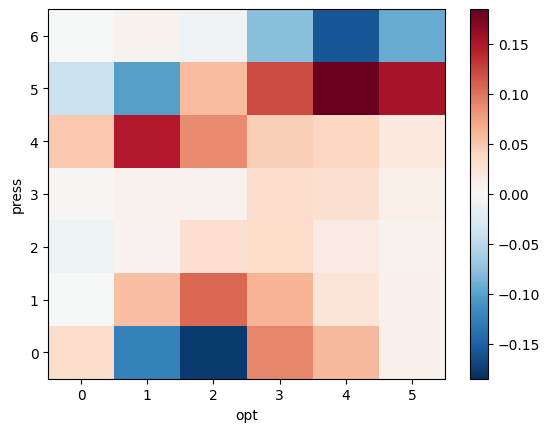

In [26]:
print(swfeed_trops.sum(["press", "opt"]).data) 
print("High cloud Tropical SW feedback = ", swfeed_trops.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical SW feedback = ", swfeed_trops.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
(swfeed_trops).plot()
# 0.7710, 0.4199, 0.3511

In [27]:
print("Tropical SW feedback sd = ", np.sum( sw_feed_st))
print("High cloud Tropical SW feedback = ", np.sum( sw_feed_st[4:,:]))
print("Low-mid cloud Tropical SW feedback = ", np.sum( sw_feed_st[:4,:]))

Tropical SW feedback sd =  0.7128390704296722
High cloud Tropical SW feedback =  0.32940067348483537
Low-mid cloud Tropical SW feedback =  0.38343839694483683


In [28]:
#6
netR_trop = K_trop*cc_trop_anom
netR_trop_mean = netR_trop.weighted(weights=weights).mean(["lat"])

net_feed =  np.zeros([7,6])
net_feed_st = np.zeros([7,6])

for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints = netR_trop_mean.sel(press=p, opt=od)
        net_regress = stats.linregress(gmst_anom_raghu, bints)
        net_feed[p, od] = net_regress.slope
        net_feed_st[p, od] = net_regress.stderr

netfeed_tropsr = xa.DataArray(net_feed, 
                    coords={"press": netR_trop_mean.press, "opt":netR_trop_mean.opt, 
                           },
                   )

<xarray.DataArray ()>
array(0.2285606)
High cloud Tropical net feedback =  0.07453115191492792
Low-mid cloud Tropical net feedback =  0.15402944685800296


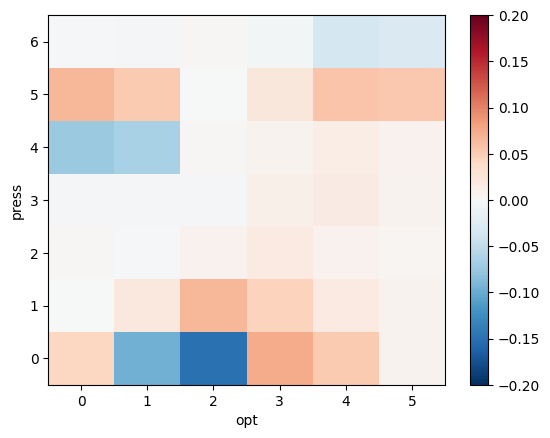

In [29]:
#netfeed_trops = swfeed_trops + lwfeed_trops
print(netfeed_tropsr.sum(["press", "opt"]))
print("High cloud Tropical net feedback = ", netfeed_tropsr.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical net feedback = ", netfeed_tropsr.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
netfeed_tropsr.plot(vmin=-0.2, vmax=0.2, cmap="RdBu_r")

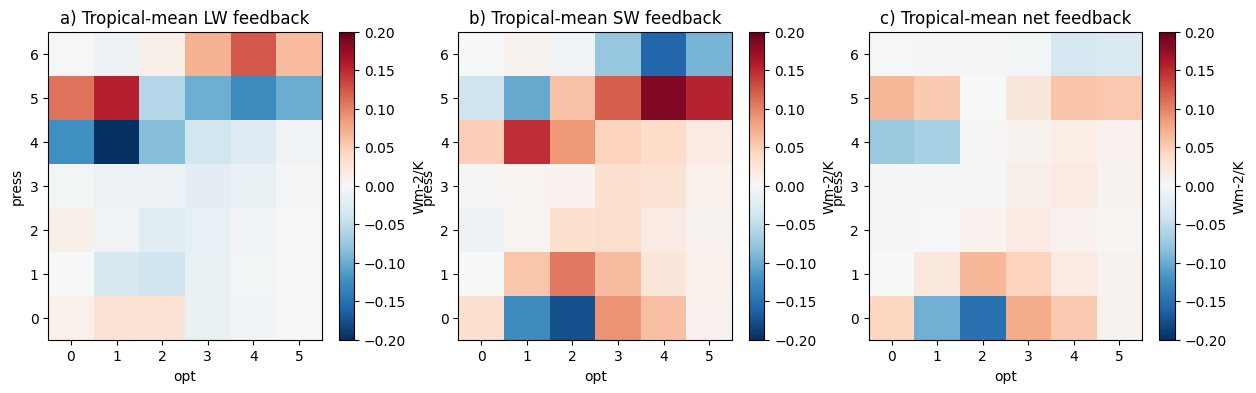

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwfeed_trops.plot(cmap="RdBu_r", vmin=-0.2, vmax=0.2, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) Tropical-mean LW feedback")
swfeed_trops.plot(cmap="RdBu_r", vmin=-0.2, vmax=0.2, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) Tropical-mean SW feedback")
netfeed_tropsr.plot(cmap="RdBu_r", vmin=-0.2, vmax=0.2, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) Tropical-mean net feedback")
plt.savefig("feedbacks.png")

In [31]:
#CIsw_reg = stats.linregress(gmst_anom_raghu, swR_trop_mean.sel(press=1, opt=1))
sw_reg.slope

from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(gmst_anom_raghu)-2)
ts*sw_reg.stderr

NameError: name 'sw_reg' is not defined

## Decomposition

In [ ]:
netfeed_tropsr.sel(press=[4,5,6]).sum(["opt"]).data.sum()
#netfeed_tropsr.sel(press=[4,5,6]).sum(["press"]).data.sum()

In [ ]:
cTot_anom = (cc_trop_anom.sel(press=[4,5,6]).sum(["press", "opt"])).mean("lat")
cTot = (area_trop.sel(press=[4,5,6]).sum(["press", "opt"])).mean("lat")

#I have tried meaning mlat before but it's worse

### Amount

In [ ]:
#K_0 = (K_trop.sel(press=[4,5,6])*(area_trop.sel(press=[4,5,6])/cTot)).sum(["press", "opt"]).mean("lat")
K_0 = K_trop.sel(press=[4,5,6]).weighted(weights=area_trop.sel(press=[4,5,6])).sum(["press", "opt"]).mean("lat")

In [ ]:
Ramt_anom = K_0*cTot_anom


In [ ]:
stats.linregress(gmst_anom_raghu, Ramt_anom).slope

0.15326004604092036

### Altitude

In [ ]:
cc_tau =  (area_trop.sel(press=[4,5,6]).sum(["press"])).mean("lat")
cc_tau.dims

('opt', 'time')

In [ ]:
K_p = K_trop.sel(press=[4,5,6]).weighted(weights=cc_tau).sum(["opt"]).mean("lat")
K_p.dims

('time', 'press')

In [ ]:
cc_p_anom = cc_trop_anom.sel(press=[4,5,6]).sum(["opt"]).mean("lat")
cc_p_anom.dims

('press', 'time')

In [ ]:
R_alt = K_p*cc_p_anom
#R_alt = R_alt.sum("press")
R_alt.dims


('time', 'press')

In [ ]:
regg = []
for p in R_alt.press:
    regg.append(stats.linregress(gmst_anom_raghu, R_alt.sel(press=p)).slope)

regg

[1.4635518038593607, 0.38613903295222457, 0.28080197512079885]

In [ ]:
np.sum(regg)
#The same result as summing first and then doing the regression!

2.130492811932384

In [49]:
#another test
net_feed =  np.zeros([6])
for od in [0,1,2,3,4,5]:
    bints = netR_trop_mean.sel( press=[4,5,6]).sum("press").sel( opt=od)
    net_regress = stats.linregress(gmst_anom_raghu, bints)
    net_feed[od] = net_regress.slope

net_feed

net_feed.sum() #result=0.074

0.0745311542002713

### OD

In [ ]:
def feedback(K, area, type):

    which = ["press", "opt"]
    opp  = which[which.index(type) - 1]
    
    cTot = area.sum(which)
    
    cc_anom = area.groupby('time.month')- area.groupby('time.month').mean('time')
    cTot_anom = cc_anom.sum(which)

    cpTot = (area/cTot).sum(type)
    Ktau = (K*cpTot).sum(opp)

    Rtau = Ktau * cc_anom.sum(opp)
    Rtau_mean = Rtau.sum(type).mean("lat")

    feed = stats.linregress(gmst_anom_raghu, Rtau_mean).slope

    return feed

In [ ]:
hc_feed_od = feedback(K_trop.sel(press=[4,5,6]), area_trop.sel(press=[4,5,6]), "opt")
hc_feed_press = feedback(K_trop.sel(press=[4,5,6]), area_trop.sel(press=[4,5,6]), "press")
K0_hc = (((area_trop.sel(press=[4,5,6])/cTot))*K_trop).sum(["opt", "press"])
R_amount_hc = K0_hc*cTot_anom
hc_feed_amt = stats.linregress(gmst_anom_raghu, R_amount_hc.mean("lat")).slope

print(hc_feed_press, hc_feed_od, hc_feed_amt )
hc_feed_res = netfeed_tropsr.sum(["press", "opt"]) - hc_feed_press - hc_feed_od - hc_feed_amt
print("res = ", hc_feed_res)


0.0589069520440096 0.014430387032000957 -0.020775594791763195
res =  <xarray.DataArray ()>
array(0.17599885)


In [ ]:
Rp_mean = (K_trop.sum("opt")*cc_trop_anom.sum("opt")).mean("lat")

ls = np.zeros(7)
print(ls)
for p in [0,1,2,3,4,5,6]:
    ls[p] = stats.linregress(gmst_anom_raghu, Rp_mean.sel(press=p)).slope

ls[4] + ls[5] + ls[6 ] 

[0. 0. 0. 0. 0. 0. 0.]


1.6350637767637541

In [ ]:
Rp_mean = (K_trop.sel(press=[4,5,6]).sum("opt")*cc_trop_anom.sel(press=[4,5,6]).sum("opt")).mean("lat")

ls2 = []
print(ls)
for p in [4,5,6]:
    ls2.append(stats.linregress(gmst_anom_raghu, Rp_mean.sel(press=p)).slope)

ls2
np.sum(ls2)

[0. 0. 0. 0.]


[1.554117173461482, 0.09720845853365129, -0.016261855231379203]

1.6350637767637541

In [ ]:
K0 = K_trop.sum(["opt", "press"])
R_amount = K0*cTot_anom
R_amount

<xarray.DataArray (time: 222, lat: 60)>
array([[ -1.6204499,  -3.9476647,  -5.8586264, ...,   2.0597372,
         -8.922479 , -11.065906 ],
       [  2.65412  ,  -3.6534646,  -6.525721 , ...,  20.693607 ,
         25.495588 ,  22.693277 ],
       [ 49.15988  ,  50.396267 ,  45.52356  , ..., -19.266628 ,
        -22.251305 , -22.5445   ],
       ...,
       [-26.624243 , -21.02153  , -23.14071  , ...,   5.310927 ,
         13.380517 ,  19.995562 ],
       [ -6.7929745,  12.320309 ,  32.560894 , ...,  17.146896 ,
         17.696842 ,  16.223286 ],
       [  5.895557 ,  22.902716 ,  22.103264 , ...,   5.7071376,
          5.990045 ,   7.060839 ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2020-12-15
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
    month    (time) int64 7 8 9 10 11 12 1 2 3 4 5 ... 2 3 4 5 6 7 8 9 10 11 12

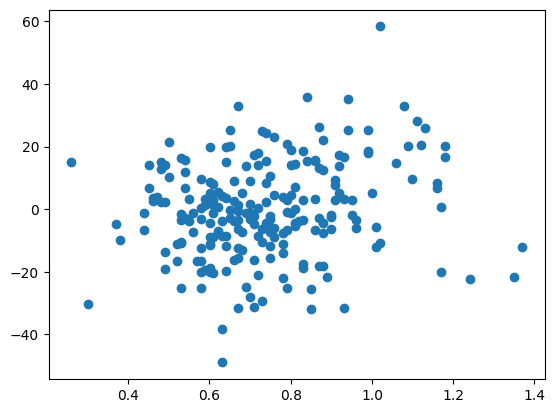

In [ ]:
plt.scatter(gmst_anom_raghu, R_amount.mean("lat"))

In [ ]:
#net feedback hc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
#amt  + alt  + od   + res
-0.05 + 0.12 + 0.06 - 0.04

0.09

In [ ]:
cpTot = (area_trop/cTot).sum("opt")
Ktau = (K_trop*cpTot).sum("press")

coTot = (area_trop/cTot).sum("press")
Kp = (K_trop*coTot).sum("opt")
Kp

<xarray.DataArray (time: 222, lat: 60, press: 7)>
array([[[-0.30404466, -0.1957964 , -0.08178638, ...,  0.20424047,
          0.34608567,  0.13224542],
        [-0.30827448, -0.19787715, -0.08693519, ...,  0.2001276 ,
          0.34807342,  0.07375243],
        [-0.30954623, -0.2016596 , -0.08991748, ...,  0.19271237,
          0.34572208,  0.11223431],
        ...,
        [-0.53485   , -0.4209534 , -0.27757576, ..., -0.09612845,
          0.10685091, -0.07683811],
        [-0.50515366, -0.40904224, -0.2718181 , ..., -0.1039281 ,
          0.09331685, -0.01618185],
        [-0.5511822 , -0.41306168, -0.27388403, ..., -0.10286073,
          0.07729097,  0.00305478]],

       [[-0.3802064 , -0.26947334, -0.17198554, ...,  0.06274212,
          0.22005534,  0.20851225],
        [-0.3813398 , -0.2721475 , -0.17240772, ...,  0.06695045,
          0.22779132,  0.26130074],
        [-0.3763781 , -0.27955362, -0.17868006, ...,  0.06506822,
          0.22417317,  0.21621679],
...
        [-0.30573094, -0.19746885, -0.0520932 , ...,  0.19631678,
          0.35999793,  0.33776218],
        [-0.32581586, -0.21085192, -0.06516667, ...,  0.18820375,
          0.35012126,  0.3703094 ],
        [-0.3261192 , -0.21552895, -0.07299951, ...,  0.18921481,
          0.34735695,  0.19763204]],

       [[-0.74151635, -0.64328223, -0.5170358 , ..., -0.35067493,
         -0.19876388, -0.1506454 ],
        [-0.7340922 , -0.6303189 , -0.4943632 , ..., -0.3148118 ,
         -0.17121844, -0.08692113],
        [-0.7056217 , -0.6162903 , -0.47651714, ..., -0.2914481 ,
         -0.15107116, -0.07753716],
        ...,
        [-0.3208234 , -0.20356227, -0.07650121, ...,  0.18414792,
          0.33161113,  0.39147693],
        [-0.32382137, -0.2028899 , -0.0784823 , ...,  0.18460082,
          0.32716843,  0.17766845],
        [-0.32080594, -0.19366372, -0.07595944, ...,  0.18904874,
          0.33025444,  0.17310375]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2020-12-15
  * lat      (lat) float32 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0

In [ ]:
Rtau = Ktau * cc_trop_anom.sum("press")
Rtau_mean = Rtau.sum("opt").mean("lat")

Rp = Kp * cc_trop_anom.sum("opt")
Rp_mean = Rp.sum("press").mean("lat")

In [ ]:
feed_alt = stats.linregress(gmst_anom_raghu, Rp_mean).slope
feed_od =stats.linregress(gmst_anom_raghu, Rtau_mean).slope
feed_amount =stats.linregress(gmst_anom_raghu, R_amount.mean("lat")).slope

print(feed_alt, feed_od, feed_amount )
feed_res = netfeed_tropsr.sum(["press", "opt"]) - feed_alt - feed_od - feed_amount
print("res = ", feed_res)


0.10047018874588262 0.3770249199125246 0.1464523443629521
res =  <xarray.DataArray ()>
array(-0.39538685)


# ITCZ

In [ ]:
itcz= slice(0,20)
ocean_only = slice(120,260)

In [ ]:
RclrLW_itcz = alllw.sel(lat=itcz,lon=ocean_only, time=ragutime).toa_lw_clr_mon.mean("lon")
RovcLW_itcz = alllw.sel(lat=itcz,lon=ocean_only, time=ragutime).toa_lw_cldtyp_mon.mean("lon")
lwK_itcz = (RclrLW_itcz - RovcLW_itcz)/100

In [ ]:
RclrSW_itcz = allsw.sel(lat=itcz,lon=ocean_only,time=ragutime).toa_sw_clr_mon.mean("lon")
RovcSW_itcz = allsw.sel(lat=itcz,lon=ocean_only,time=ragutime).toa_sw_cldtyp_mon.mean("lon")
swK_itcz = (RclrSW_itcz - RovcSW_itcz)/100

In [ ]:
K_itcz = swK_itcz + lwK_itcz

Text(0.5, 1.0, 'c) ITCZ-mean net kernel')

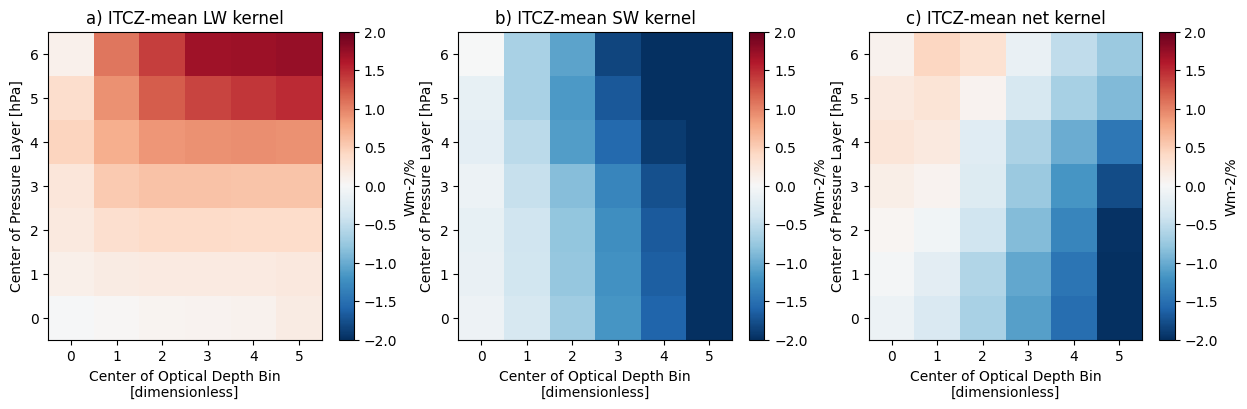

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwK_itcz.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) ITCZ-mean LW kernel")
swK_itcz.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) ITCZ-mean SW kernel")
K_itcz.mean(["lat","time"]).transpose().plot(cmap="RdBu_r", vmin=-2.0, vmax=2.0, cbar_kwargs={'label': "Wm-2/%", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) ITCZ-mean net kernel")
#plt.savefig("kernels.png")

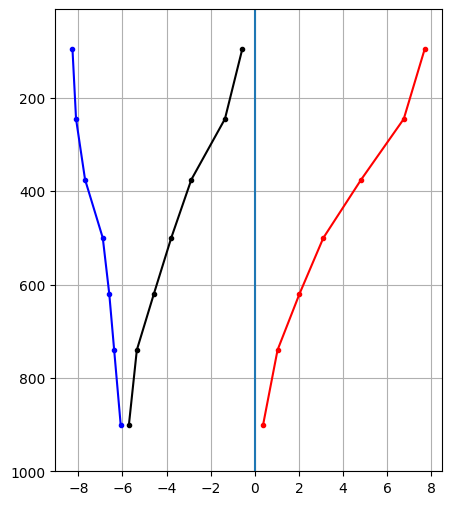

In [ ]:
plt.figure(figsize=(5,6))
plt.plot(lwK_itcz.mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-r")
plt.plot(swK_itcz.mean(["lat","time"]).sum("opt"),  midpoints[1:], ".-b")
plt.plot(K_itcz.mean(["lat","time"]).sum("opt"), midpoints[1:], ".-k")
plt.gca().invert_yaxis()
plt.ylim(1000,10)
plt.vlines(0, ymin=1000, ymax=10)
plt.grid()

IN conclusion, kernels dont change much with area or time

In [ ]:
#2
area_itcz = alllw.cldarea_cldtyp_mon.sel(lat=itcz, lon=ocean_only,time=ragutime).mean("lon")
cc_itcz_anom = area_itcz.groupby('time.month')- area_itcz.groupby('time.month').mean('time')

In [ ]:
#3
lwR_itcz = lwK_itcz*cc_itcz_anom
swR_itcz = swK_itcz*cc_itcz_anom

In [ ]:
lwR_itcz

<xarray.DataArray (time: 222, lat: 20, opt: 6, press: 7)>
array([[[[ 1.34133296e-02,  6.59666257e-03, -2.76212096e-02, ...,
          -1.03986531e-01, -6.21967971e-01,  1.80809554e-02],
         [-1.95695926e-03, -1.77243724e-02, -4.49812226e-02, ...,
          -3.36255692e-02, -2.03204155e+00, -5.63833192e-02],
         [-3.91550213e-02, -9.47532244e-03, -5.78209162e-02, ...,
          -9.01000202e-02, -2.10585022e+00, -7.67902210e-02],
         [-6.13449188e-03, -5.86311612e-03,  2.55575292e-02, ...,
           4.61820439e-02, -1.17181051e+00, -2.55926669e-01],
         [ 3.73270421e-04, -9.62682127e-04,  1.20447378e-03, ...,
           3.08846980e-02, -1.95307285e-01, -6.50602102e-01],
         [            nan,             nan, -5.38579443e-05, ...,
           2.09939852e-03,  1.01585187e-01, -4.19165611e-01]],

        [[ 1.10764811e-02, -1.88494800e-03, -1.32303254e-03, ...,
           4.76496443e-02, -2.88778871e-01,  2.13111863e-02],
         [-2.54831556e-02, -2.99660861e-02, -2.67774388e-02, ...,
          -7.18995333e-02, -1.97560799e+00,  3.98735330e-03],
         [-4.49358448e-02, -3.17384750e-02, -7.54502639e-02, ...,
          -1.70679659e-01, -2.20924187e+00, -9.24013332e-02],
         [-5.77655341e-03, -9.74429026e-03, -1.14593690e-03, ...,
...
         [ 2.26339186e-03, -1.03044927e-01, -6.89620078e-02, ...,
          -2.69420177e-01, -1.28756762e-01,  2.07405295e-02],
         [-1.51367520e-03, -5.59637360e-02, -5.88994399e-02, ...,
          -1.08593583e-01, -1.26430631e-01,  9.53119919e-02],
         [            nan, -9.43069905e-03, -9.14976373e-03, ...,
          -1.82044450e-02, -1.06659599e-01,  1.88878834e-01]],

        [[ 1.74539723e-02, -1.17795039e-02, -9.99301672e-03, ...,
          -4.36760522e-02, -2.05009654e-01, -3.37973237e-02],
         [-5.97399957e-02, -1.29525900e-01, -4.11620252e-02, ...,
          -7.36044794e-02,  2.16101622e-03, -2.60855677e-03],
         [-2.97672953e-02, -2.04418361e-01, -1.00384884e-01, ...,
           1.75235458e-02, -1.10646702e-01,  2.28215172e-03],
         [-1.57613978e-02, -1.40066370e-01, -9.73823145e-02, ...,
          -1.89220369e-01, -2.83338577e-01,  1.26867546e-02],
         [-1.48632154e-02, -7.00591803e-02, -4.02842127e-02, ...,
          -2.07294345e-01, -3.18119735e-01,  1.01006046e-01],
         [            nan, -5.30964509e-03, -1.17418719e-02, ...,
          -2.15353742e-02, -2.26457030e-01,  4.23224904e-02]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2020-12-15
  * lat      (lat) float32 0.5 1.5 2.5 3.5 4.5 5.5 ... 15.5 16.5 17.5 18.5 19.5
  * press    (press) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0
  * opt      (opt) float32 0.0 1.0 2.0 3.0 4.0 5.0
    month    (time) int64 7 8 9 10 11 12 1 2 3 4 5 ... 2 3 4 5 6 7 8 9 10 11 12

In [ ]:
lw_itcz = np.cos(np.deg2rad(lwR_itcz.lat))

lwR_itcz_mean = lwR_itcz.weighted(weights=lw_itcz).mean("lat") 
swR_itcz_mean = swR_itcz.weighted(weights=lw_itcz).mean("lat")

In [ ]:
lw_feed_itcz =  np.zeros([7,6])
lw_feed_itcz_st =  np.zeros([7,6])

for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints_itcz = lwR_itcz_mean.sel(press=p, opt=od)
        lw_regress  = stats.linregress(gmst_anom_raghu, bints_itcz)
        lw_feed_itcz[p, od] = lw_regress.slope
        lw_feed_itcz_st[p, od] = lw_regress.stderr

lwfeed_itcz = xa.DataArray(lw_feed_itcz,  
                    coords={"press": lwR_itcz_mean.press, "opt":lwR_itcz_mean.opt, 
                           },
                   )

1.2117501084856193
High cloud ITCZ SW feedback =  1.337571067966178
Low-mid cloud ITCZ SW feedback =  -0.12582095948055885


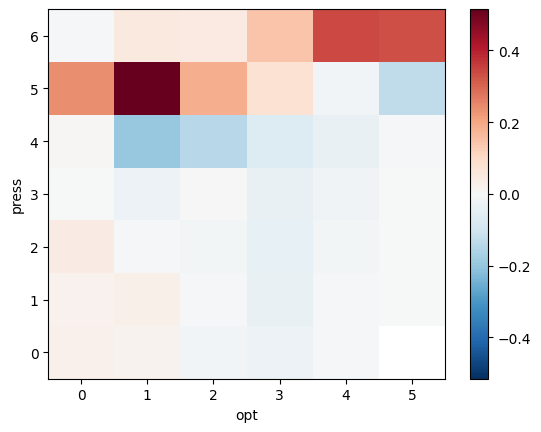

In [ ]:
print(lwfeed_itcz.sum(["press", "opt"]).data)
print("High cloud ITCZ SW feedback = ", lwfeed_itcz.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud ITCZ SW feedback = ", lwfeed_itcz.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
(lwfeed_itcz).plot() #vmin=-0.2, vmax=0.2, cmap="RdBu_r"

In [ ]:
sw_feed_itcz =  np.zeros([7,6])
for od in [0,1,2,3,4,5]:
    for p in [0,1,2,3,4,5,6]:
        bints = swR_itcz_mean.sel(press=p, opt=od)
        sw_regress = stats.linregress(gmst_anom_raghu, bints).slope
        sw_feed_itcz[p, od] = sw_regress

swfeed_itcz = xa.DataArray(sw_feed_itcz, 
                    coords={"press": swR_itcz_mean.press, "opt":swR_itcz_mean.opt, 
                           },
                   )

0.42744078240299394
High cloud ITCZ SW feedback =  -1.319930870039883
Low-mid cloud ITCZ SW feedback =  1.7473716524428773


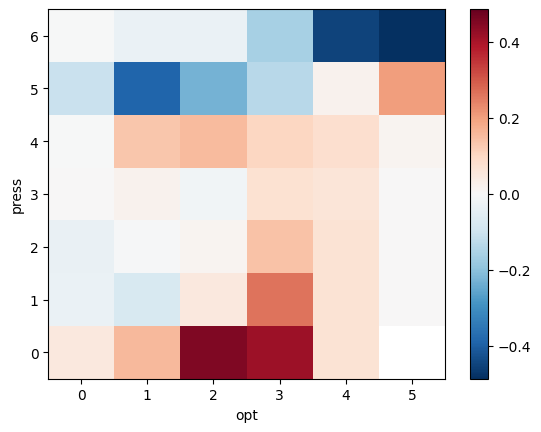

In [ ]:
print(swfeed_itcz.sum(["press", "opt"]).data)
print("High cloud ITCZ SW feedback = ", swfeed_itcz.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud ITCZ SW feedback = ", swfeed_itcz.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
(swfeed_itcz).plot() #vmin=-0.2, vmax=0.2, cmap="RdBu_r"

<xarray.DataArray ()>
array(1.63919089)
High cloud Tropical net feedback =  0.017640197926294843
Low-mid cloud Tropical net feedback =  1.6215506929623185


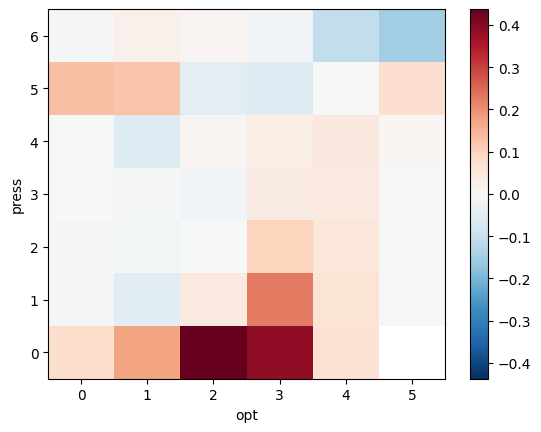

In [ ]:
netfeed_itcz = swfeed_itcz + lwfeed_itcz
print(netfeed_itcz.sum(["press", "opt"]))
print("High cloud Tropical net feedback = ", netfeed_itcz.sel(press=[4,5,6]).sum(["press", "opt"]).data)
print("Low-mid cloud Tropical net feedback = ", netfeed_itcz.sel(press=[0,1,2,3]).sum(["press", "opt"]).data)
netfeed_itcz.plot() #vmin=-0.2, vmax=0.2, cmap="RdBu_r"

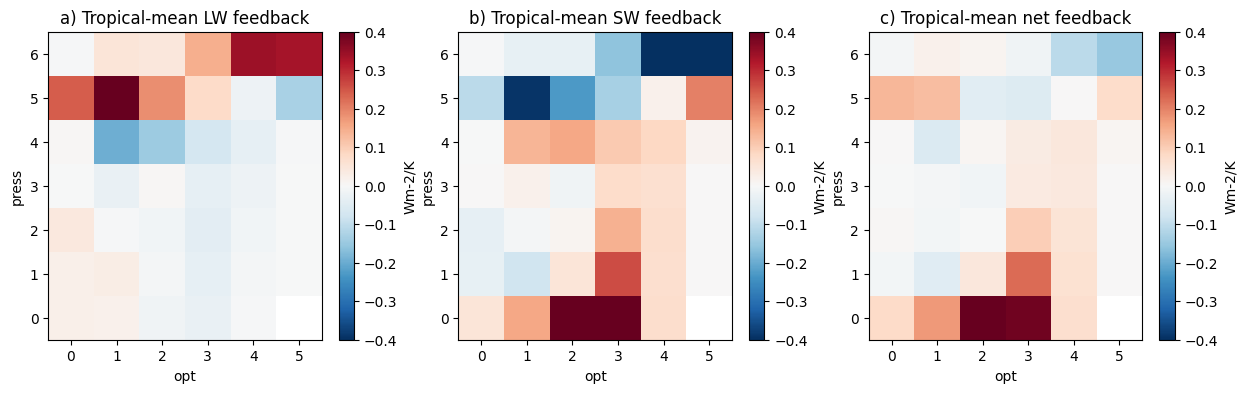

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#fig.suptitle('Horizontally stacked subplots')
lwfeed_itcz.plot(cmap="RdBu_r", vmin=-0.4, vmax=0.4, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax1)
ax1.set_title("a) Tropical-mean LW feedback")
swfeed_itcz.plot(cmap="RdBu_r", vmin=-0.4, vmax=0.4, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax2)
ax2.set_title("b) Tropical-mean SW feedback")
netfeed_itcz.plot(cmap="RdBu_r", vmin=-0.4, vmax=0.4, cbar_kwargs={'label': "Wm-2/K", 'extend': 'neither'}, ax=ax3)
ax3.set_title("c) Tropical-mean net feedback")
#plt.savefig("feedbacks_itcz.png")